In [42]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
from sklearn.model_selection import train_test_split # 训练集测试集划分
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 载入 MNIST 手写数字图片数据集
mnist = fetch_openml("mnist_784")

df = pd.DataFrame(mnist.data)
print(df.head())

# 数据预处理，标准归一化
scaler = StandardScaler()
X = scaler.fit_transform(mnist.data)
print(X.shape)

# 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, mnist.target, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression(max_iter=1000)

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 输出模型的准确率
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("均方误差:", mse)
print("R2 分数:", r2)
print("模型准确率:", model.score(X_test, y_test))


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [13]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [18]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [19]:

transform = transforms.Compose([
    transforms.Resize((28, 28)),                  # 调整图像大小为28x28
    transforms.ToTensor(),                        # 转换为Tensor
])

In [20]:
# 加载训练集数据
train_dataset = datasets.MNIST(
    root='./data',  # 数据存储的路径
    train=True,  # 表示加载训练数据集
    download=True,  # 如果数据集没有下载，会自动下载
    transform=transform  # 对数据应用transform操作，例如转换为Tensor
)

# 加载测试集数据，MNIST数据集的测试部分，train=False表示加载测试集
test_dataset = datasets.MNIST(
    root='./data',  # 数据存储的路径
    train=False,  # 表示加载测试数据集
    download=True,  # 如果数据集没有下载，会自动下载
    transform=transform  # 对数据应用transform操作，例如转换为Tensor
)

100%|██████████| 9.91M/9.91M [00:03<00:00, 3.00MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 593kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 957kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.61MB/s]


7


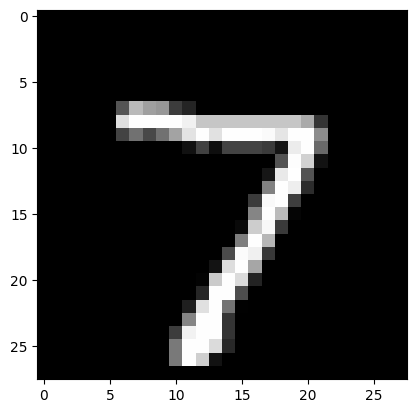

In [33]:
img, label = test_dataset[0]
img = img.permute(1, 2, 0)  #  Tensor，转换成 (H, W, C) 格式
plt.imshow(img, cmap='gray') 
print(label)

In [34]:

# 使用DataLoader来加载训练数据

train_loader = DataLoader(
    train_dataset,  # 传入训练数据集
    batch_size=32,  # 批次数量
    shuffle=True,  # 打乱数据
    num_workers=8  # 加载数据进程数
)

test_loader = DataLoader(
    test_dataset,  # 传入测试数据集
    batch_size=32,  # 每批次数量
    shuffle=False,  # 不打乱数据
    num_workers=8  # 加载数据进程数
)

In [35]:

# 检查是否有可用的GPU，如果有就使用GPU，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
# 定义LeNet-5网络结构
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        # 第一层卷积层：输入1通道，输出6通道，卷积核5x5，padding=same
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        # 第一层池化层：2x2平均池化
        self.pool1 = nn.AvgPool2d(kernel_size=2)
        # 第二层卷积层：输入6通道，输出16通道，卷积核5x5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # 第二层池化层：2x2平均池化
        self.pool2 = nn.AvgPool2d(kernel_size=2)
        # 第三层卷积层：输入16通道，输出120通道，卷积核5x5
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)
        # 展平层
        self.flatten = nn.Flatten()
        # 全连接层：输入120，输出84
        self.fc1 = nn.Linear(120, 84)
        # 全连接层：输入84，输出10（对应10个类别）
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        # 第一层卷积 + 激活 + 池化
        x = torch.sigmoid(self.conv1(x))
        x = self.pool1(x)
        # 第二层卷积 + 激活 + 池化
        x = torch.sigmoid(self.conv2(x))
        x = self.pool2(x)
        # 第三层卷积 + 激活
        x = torch.sigmoid(self.conv3(x))
        # 展平
        x = self.flatten(x)  # 使用 flatten 层
        # 全连接层 + 激活
        x = torch.sigmoid(self.fc1(x))
        # 输出层
        x = self.fc2(x)
        return x

In [37]:

model = LeNet5().to(device)# 初始化模型，并将模型移至 GPU（如果可用）
criterion = nn.CrossEntropyLoss()  # 分类任务使用交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001) #设置优化器

In [38]:
def compute_accuracy(loader, device):
    correct = 0  # 初始化正确预测的数
    total = 0    # 初始化总的样本数
    with torch.no_grad():  # 不需计算梯度，这样可以节省内存和计算资源
        for inputs, labels in loader:# 遍历数据加载器中的每一个 batch
            inputs, labels = inputs.to(device), labels.to(device)  # 将输入数据和标签转移到指定的设备
            outputs = model(inputs)  # 用当前的模型进行前向传播，得到预测结果
            max_values, predicted = torch.max(outputs, 1)  # 对每个输出的预测结果，找到最大值对应的索引，返回预测的类标签
            total += labels.size(0)  # 更新总样本数， labels.size(0) 是当前 batch 的样本数
            correct += (predicted == labels).sum().item()  # 统计预测正确的样本
    accuracy = 100 * correct / total  # 计算准确率
    return accuracy  # 返回计算得到的准确率

In [39]:
num_epochs = 5  # 设置训练的总轮数

for epoch in range(num_epochs):
    model.train()  # 设置为训练模式
    total_loss = 0  # 记录当前 epoch 的总损失
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # 清除之前计算的梯度
        outputs = model(inputs)  # 进行前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播计算梯度
        optimizer.step()  # 更新参数
        total_loss += loss.item()  # 累加损失
    
    # 打印损失
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")
    # 打印训练集和测试集的准确率
    train_accuracy = compute_accuracy(train_loader, device)
    test_accuracy = compute_accuracy(test_loader, device)
    print(f"Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/5], Loss: 0.8267
Train Accuracy: 92.50%, Test Accuracy: 92.59%
Epoch [2/5], Loss: 0.1962
Train Accuracy: 95.50%, Test Accuracy: 95.65%
Epoch [3/5], Loss: 0.1319
Train Accuracy: 96.64%, Test Accuracy: 96.64%
Epoch [4/5], Loss: 0.0990
Train Accuracy: 97.11%, Test Accuracy: 96.99%
Epoch [5/5], Loss: 0.0788
Train Accuracy: 98.04%, Test Accuracy: 97.94%


In [40]:

torch.save(model.state_dict(), 'lenet5.pth') #保存模型
print("模型已保存为 lenet5.pth")

模型已保存为 lenet5.pth
